# Example usage of the MBAM codes

In [2]:
%run "MBAM_codes.py"

## Model $\theta^0+\frac{(t\theta^1)^2}{2}$

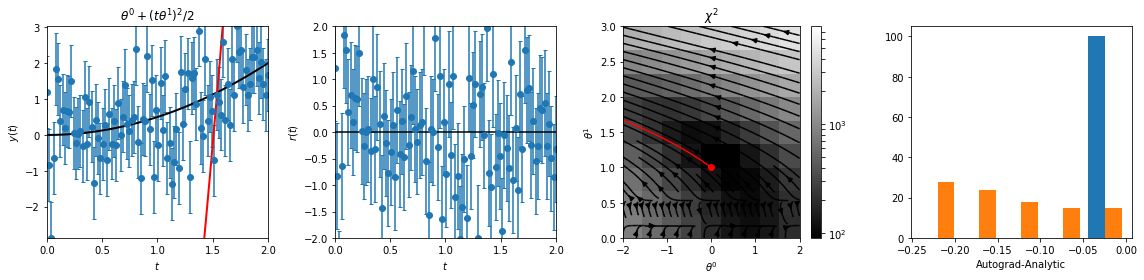

In [3]:
class model(MBAM_plotting):
    def __init__(self,*args,**kwargs):
        MBAM_plotting.__init__(self,self._model,'quadratic',*args,**kwargs)
        self._title = r'$\theta^0+(t\theta^1)^2/2$'
    def _model(self,T,θ):
        x1,x2=θ
        return np.power(x2*T,2.)/2.+x1
    def analytic(self,θ,x,σ,τ):
        n = 2.
        g = np.array([[np.sum(1/σ**2),np.sum(x**n/σ**2)],
                      [np.sum(x**n/σ**2),np.sum(x**(2*n)/σ**2)]])
        λ, v = np.linalg.eigh(g)
        v = v[:,0]
        
        return g,λ[0],np.array([v[0]*τ+θ[0],θ[1]**(1-1/n)*(θ[1]+n*v[1]*τ)**(1/n)])
N_D = 100
σ   = 1
bf  = np.array([0.,1.])
X   = np.linspace(0,2,N_D)
Y   = np.random.normal(0,σ,N_D)+model._model(model,X,bf)
MPL = model(X,Y,Y/Y,bf,xlim=[-2,2],ylim=[0,3])

θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(10,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0]])
MPL.MBAM_T, MPL.MBAM_sol = MPL.run_MBAM(bf,k=0,dmax=1)[1:]
MPL.MBAM_a = MPL.analytic(MPL.θ_bf,MPL.t,MPL.σ,MPL.MBAM_T)[2]

f,ax = plt.subplots(1,4,figsize=(4*4,4))
MPL.plot_data(ax[:2])

MPL.plot_scalar(ax[2],X,Y, ALL[:,:,0], ALL[:,:,1], ALL[:,:,2])
ax[0].set_title(MPL._title)
ax[0].plot(MPL.t,MPL._model(MPL.t,MPL.MBAM_sol[-1,:2]),'r',lw=2)

ax[2].plot(MPL.MBAM_sol[:,0],MPL.MBAM_sol[:,1],'r')
ax[2].set_title('$\chi^2$')

ax[3].hist(MPL.MBAM_sol[:,:2]-MPL.MBAM_a.T,5)
ax[3].set_xlabel('Autograd-Analytic')

f.tight_layout()
#f.savefig(MPL.NAME+'_model.pdf')